In [2]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [7]:
import sys
sys.path.append("..")

In [31]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from coordination.model.vocalic_model import VocalicModel

In [26]:
# Inspect saved Inference Data onject
DATA_DIR="/Users/paulosoares/data/publication_2023/asist_usar_task/inferences/vocalic/2_features/T000671"
with open(f"{DATA_DIR}/inference_data.pkl", "rb") as f:
    idata = pickle.load(f)

idata

Inference data with groups:
	> posterior
	> sample_stats
	> prior
	> prior_predictive
	> observed_data

Text(0, 0.5, 'Coordination')

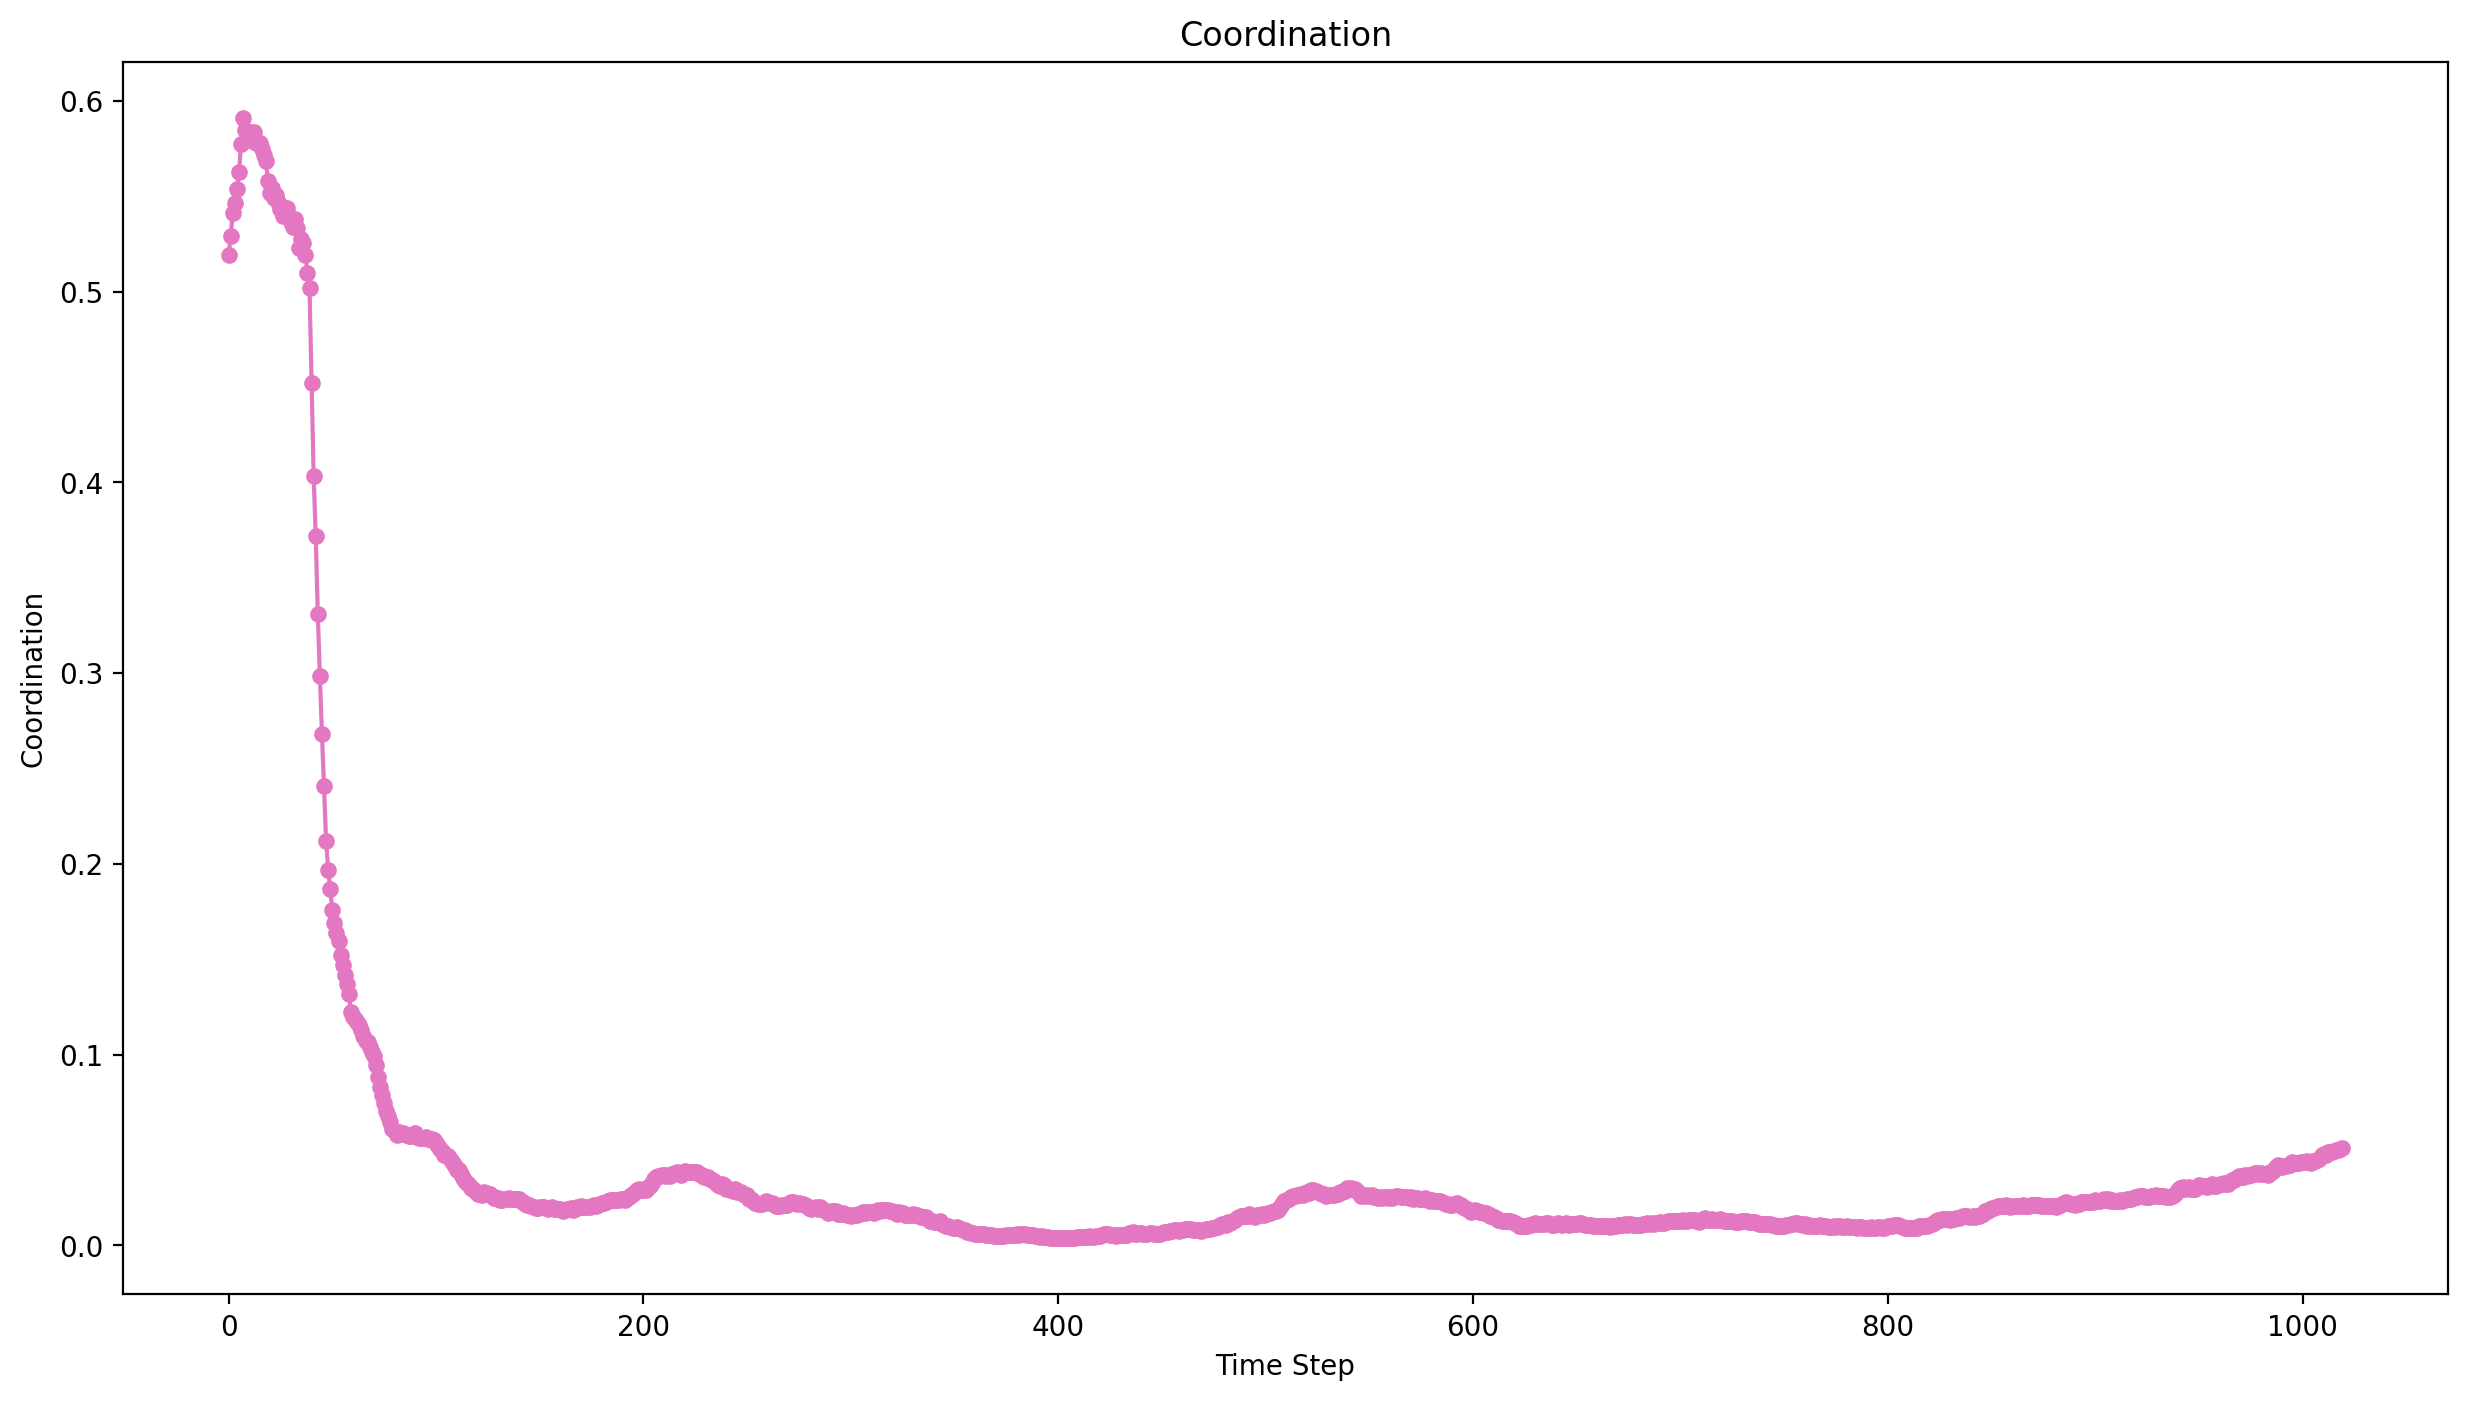

In [29]:
posterior_samples = VocalicModel.inference_data_to_posterior_samples(idata)

T = posterior_samples.coordination.sizes["coordination_time"]
C = posterior_samples.coordination.sizes["chain"]
N = posterior_samples.coordination.sizes["draw"]
stacked_coordination_samples = posterior_samples.coordination.stack(chain_plus_draw=("chain", "draw"))

fig = plt.figure(figsize=(15, 8))
# plt.plot(np.arange(T)[:, None].repeat(N * C, axis=1), stacked_coordination_samples, color="tab:blue", alpha=0.3)
plt.plot(np.arange(T), posterior_samples.coordination.mean(dim=["chain", "draw"]), color="tab:pink", alpha=1,
         marker="o", markersize=5)
plt.title(f"Coordination")
plt.xlabel(f"Time Step")
plt.ylabel(f"Coordination")

In [46]:
from IPython.core.display import display,HTML

df = pd.DataFrame([['A231', 'Book', 5, 3, 150], 
                   ['M441', 'Magic Staff', 10, 7, 200]],
                   columns = ['Code', 'Name', 'Price', 'Net', 'Sales'])

# your images
images1 = ['Images/2_features/T000671/plots/posterior/coordination.png',
           'Images/2_features/T000671/plots/posterior/coordination.png'] 


df['imageUrls'] = images1


# convert your links to html tags 
def path_to_image_html(path):
    return '<img src="'+ path + '" width="400" >'

pd.set_option('display.max_colwidth', None)

image_cols = ['imageUrls']  #<- define which columns will be used to convert to html

# Create the dictionariy to be passed as formatters
format_dict = {}
for image_col in image_cols:
    format_dict[image_col] = path_to_image_html


display(HTML(df.to_html(escape=False ,formatters=format_dict)))

/var/folders/xy/pk0wh2pd6x12m__j8r7ql0f40000gs/T/ipykernel_2644/2968246979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display,HTML


,Code,Name,Price,Net,Sales,imageUrls
0,A231,Book,5,3,150,
1,M441,Magic Staff,10,7,200,
